### EDA on student perfomance data 

### The life cycle of a machine learning project

1. Understanding the problem statement
2. Data Collection
3. Data Checks to performs 
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

## The Problem Statement

- The Project Understands how the student's perfomance (test scores) is affected by other variables such as Gender, Ethnicty, Parental level of education, Lunch and Test preparation course.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(f"The column name is  {col.upper()}  and it's unique values are =>  {df[col].unique()}")
    print()

The column name is  GENDER  and it's unique values are =>  ['female' 'male']

The column name is  RACE_ETHNICITY  and it's unique values are =>  ['group B' 'group C' 'group A' 'group D' 'group E']

The column name is  PARENTAL_LEVEL_OF_EDUCATION  and it's unique values are =>  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

The column name is  LUNCH  and it's unique values are =>  ['standard' 'free/reduced']

The column name is  TEST_PREPARATION_COURSE  and it's unique values are =>  ['none' 'completed']






In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('The number of  numerical features in the dataset are {} and they are  : {}'.format(len(numeric_features), numeric_features))
print("\nThe number of categorical features in the dataset are {} and they are : {}".format(len(categorical_features),categorical_features))

The number of  numerical features in the dataset are 3 and they are  : ['math_score', 'reading_score', 'writing_score']

The number of categorical features in the dataset are 5 and they are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
# creating two new columns named total_score and average 

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Analysing the data 

In [14]:
full_in_reading = df[df['reading_score'] == 100]['average'].count()
full_in_math = df[df['math_score'] == 100]['average'].count()
full_in_writing = df[df['writing_score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths: {full_in_math}")
print(f"Number of students with full marks in reading: {full_in_reading}")
print(f"Number of students with full marks in writing: {full_in_writing}")


Number of students with full marks in Maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [15]:
less_than_20_reading = df[df['reading_score'] <= 20]['average'].count()
less_than_20_writing = df[df['writing_score'] <= 20]['average'].count()
less_than_20_math = df[df['math_score'] <= 20]['average'].count()
print(f"Number of students who got less than 20 in reading: {less_than_20_reading}")
print(f"Number of students who got less than 20 in writing: {less_than_20_writing}")
print(f"Number of students who got less than 20 in math: {less_than_20_math}")

Number of students who got less than 20 in reading: 1
Number of students who got less than 20 in writing: 3
Number of students who got less than 20 in math: 4


### Insight

1. From the above values 
    - Students performed worst in the maths
    - Students performed well in the reading 
    - 17 students got 100 out 100 in reading

## Data Visualization

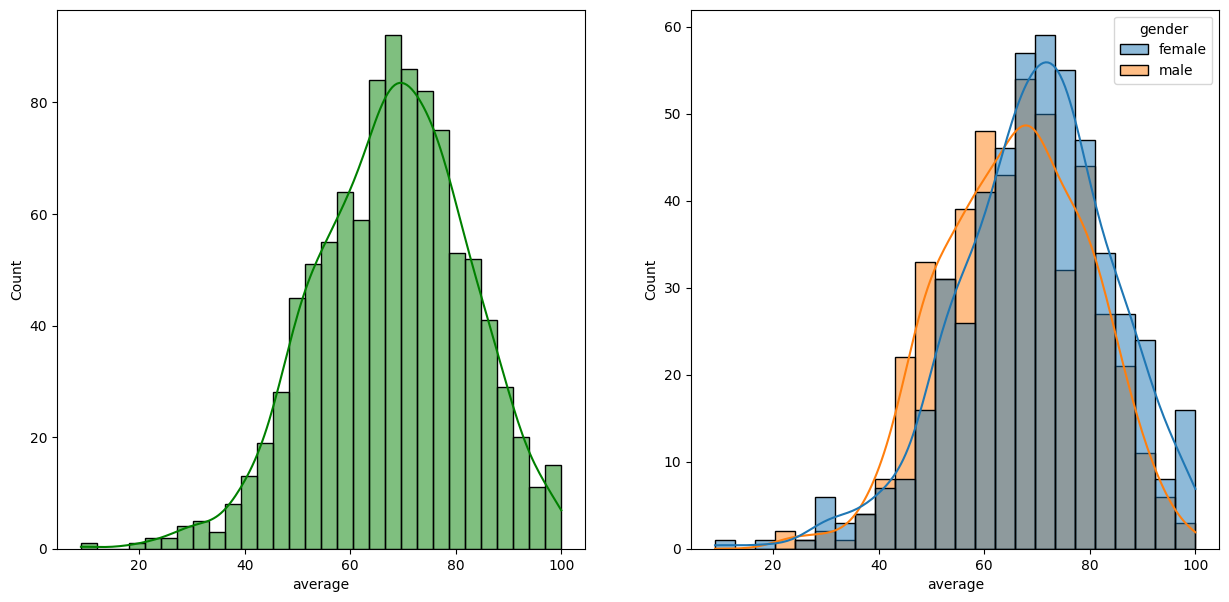

In [16]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x= 'average', kde=True, color = 'g',bins = 30)
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

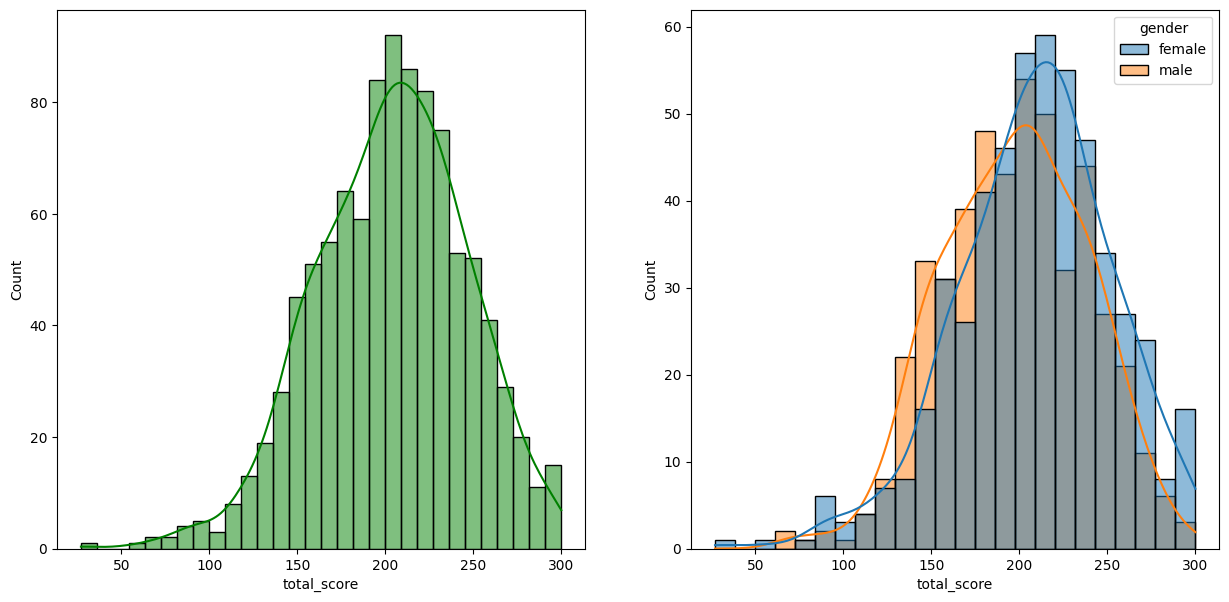

In [17]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

### Insight

1.  Female students are performing better when compared to the male students

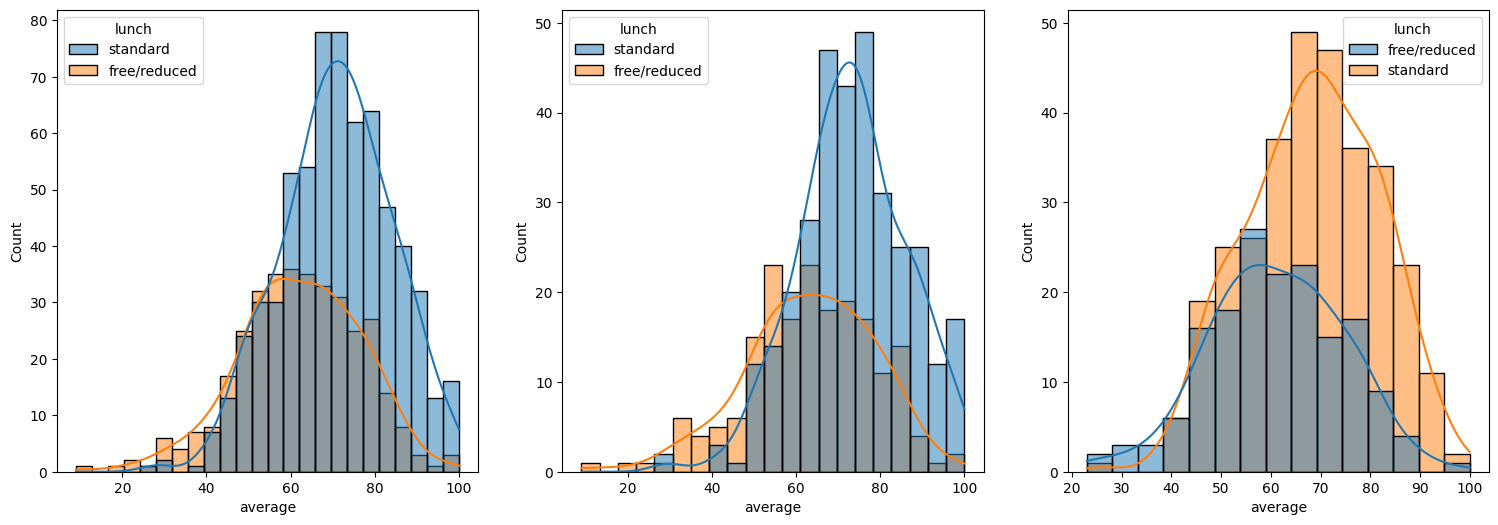

In [18]:
fig,axis = plt.subplots(1,2,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average',kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

### Insight

1. Standard lunch helps students to perform well in the exams
2. Standard lunch helps the students to perform well in the exams either it is male of female


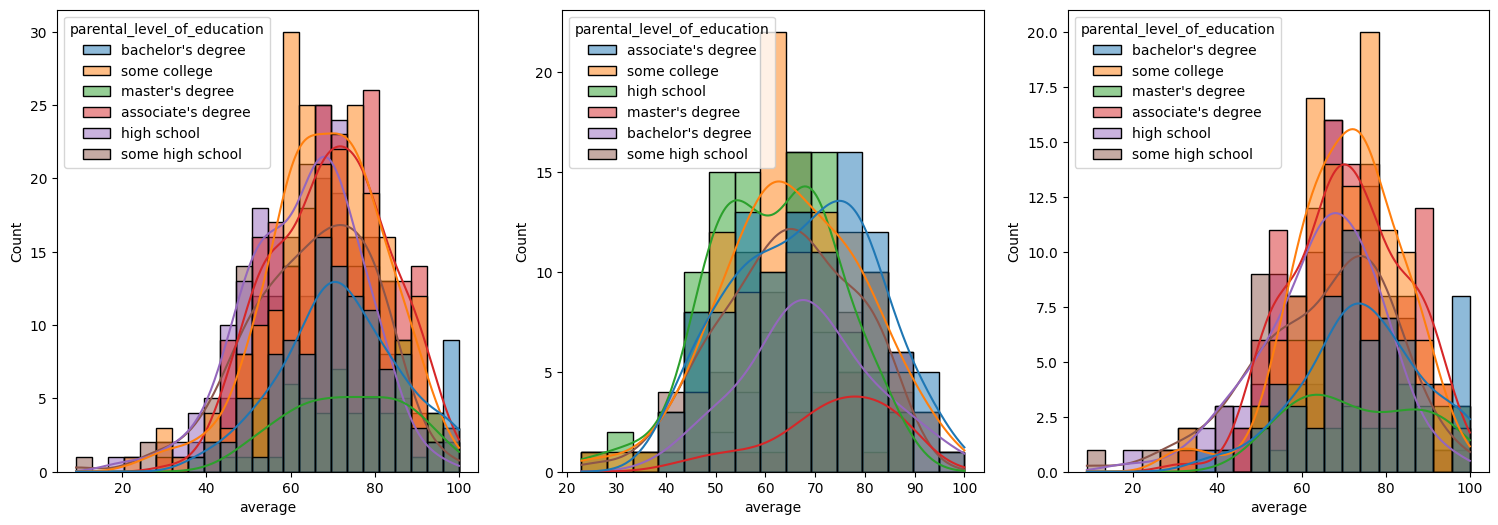

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

## Insights

1. In general parent's education doesn't much help in student perfomance in the exam
2. from the second plot we can see , parent's whose education is of assocaite's degree or master's degree their male child tend to perform well in the exam.
3. From the Third Plot we can see there is no effect of parent's education on female students

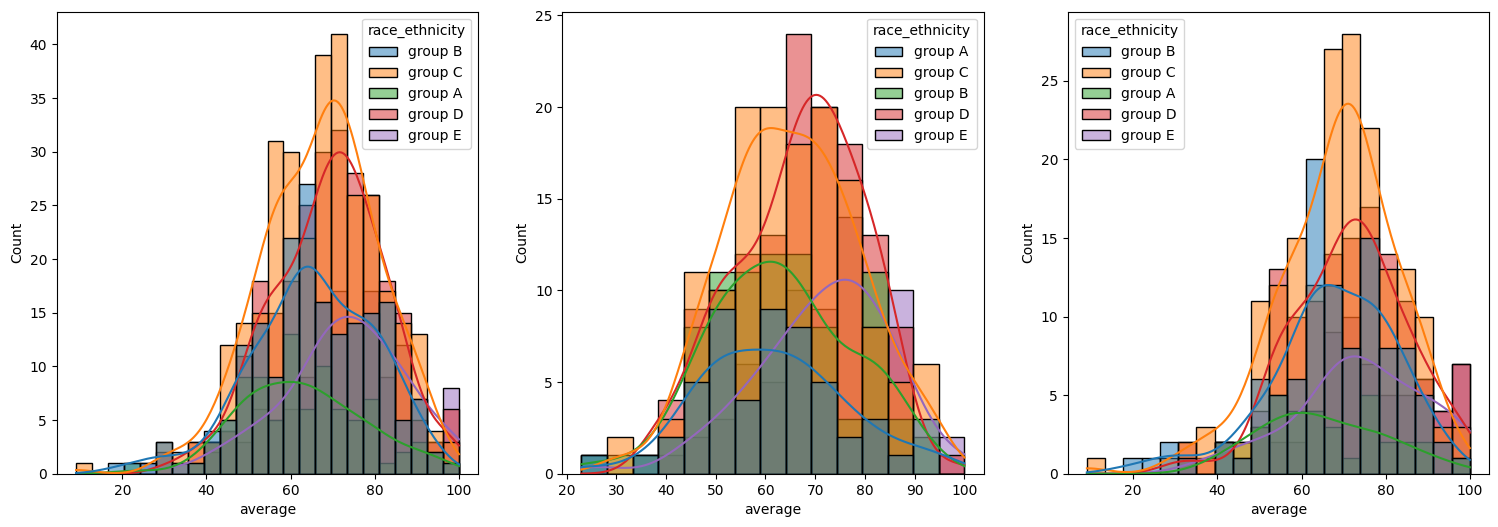

In [20]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average', kde = True, hue = "race_ethnicity")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True, hue = 'race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'race_ethnicity')
plt.show()

### Insigths

1. Students of group A and group B tends to perform poorly in the exam.
2. Students of group A and group B tends to perform poorly in the irrespective of whether they are male or female 

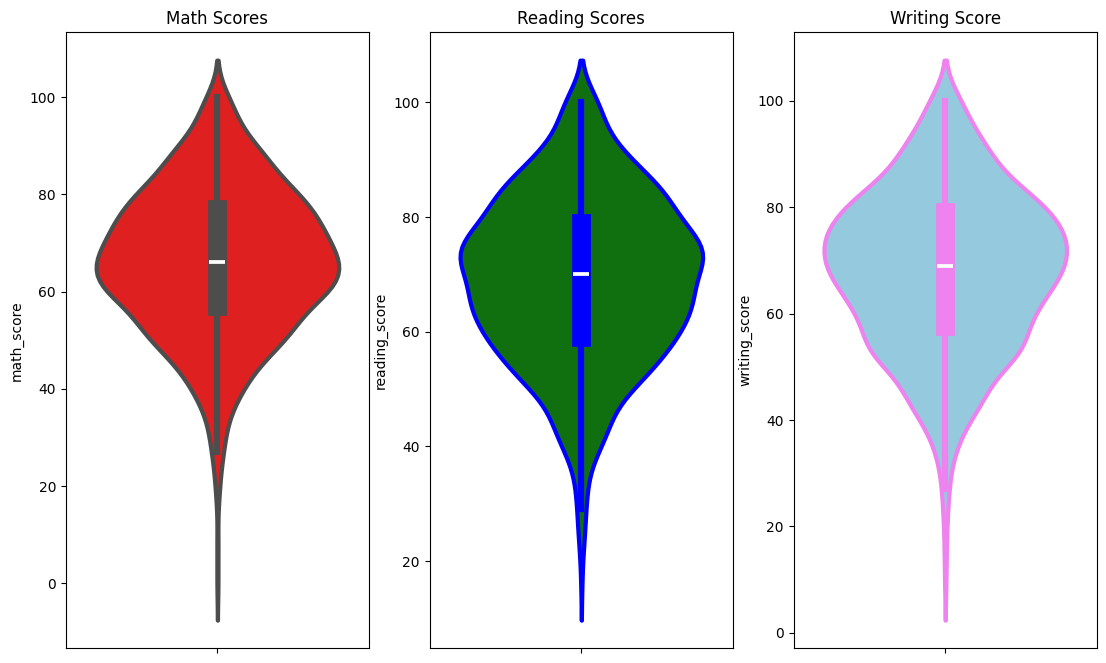

In [21]:
# Maximum score of students in all three subjects

plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(data = df, y = 'math_score', color = 'red', linewidth = 3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(data = df, y = 'reading_score', color = 'green', linewidth=3, linecolor='blue')
plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(data = df, y = 'writing_score', color = 'skyblue',linewidth=3, linecolor='violet')
plt.show()

### Insights

1. From the above three diagrams we can see that , most of the students math score lies in the range of 60 - 80 where as in reading they lie in the range of 50 - 80

## Mutlivariate analysis 

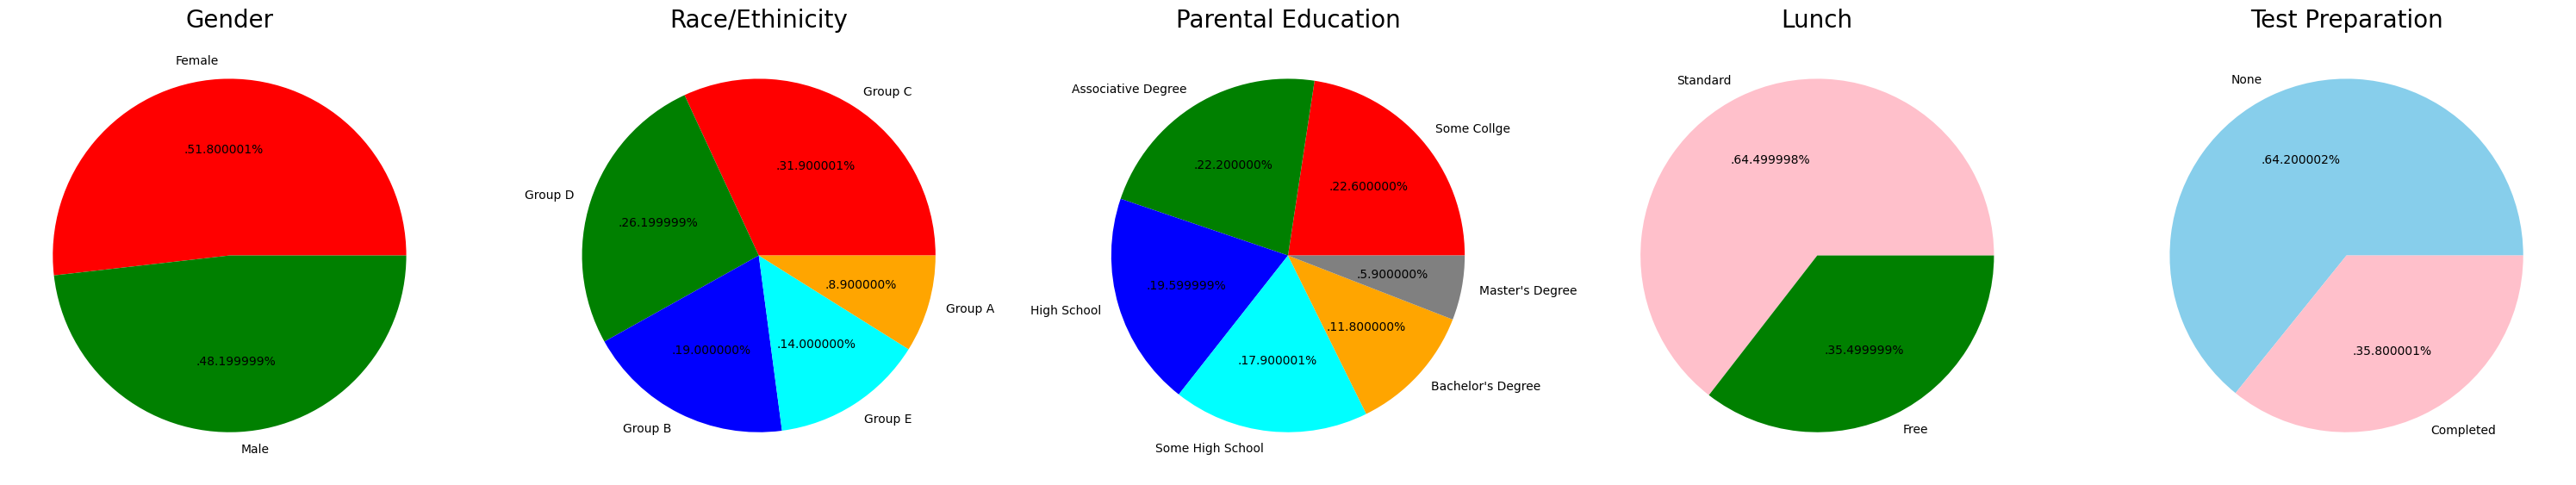

In [37]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size , colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size , colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethinicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = "Some Collge", "Associative Degree", "High School", 'Some High School ',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size , colors = color, labels = labels, autopct='.%2f%%')
plt.title("Parental Education",fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['pink','green']

plt.pie(size , colors = color, labels = labels, autopct='.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['skyblue','pink']

plt.pie(size , colors = color, labels = labels, autopct='.%2f%%')
plt.title("Test Preparation", fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

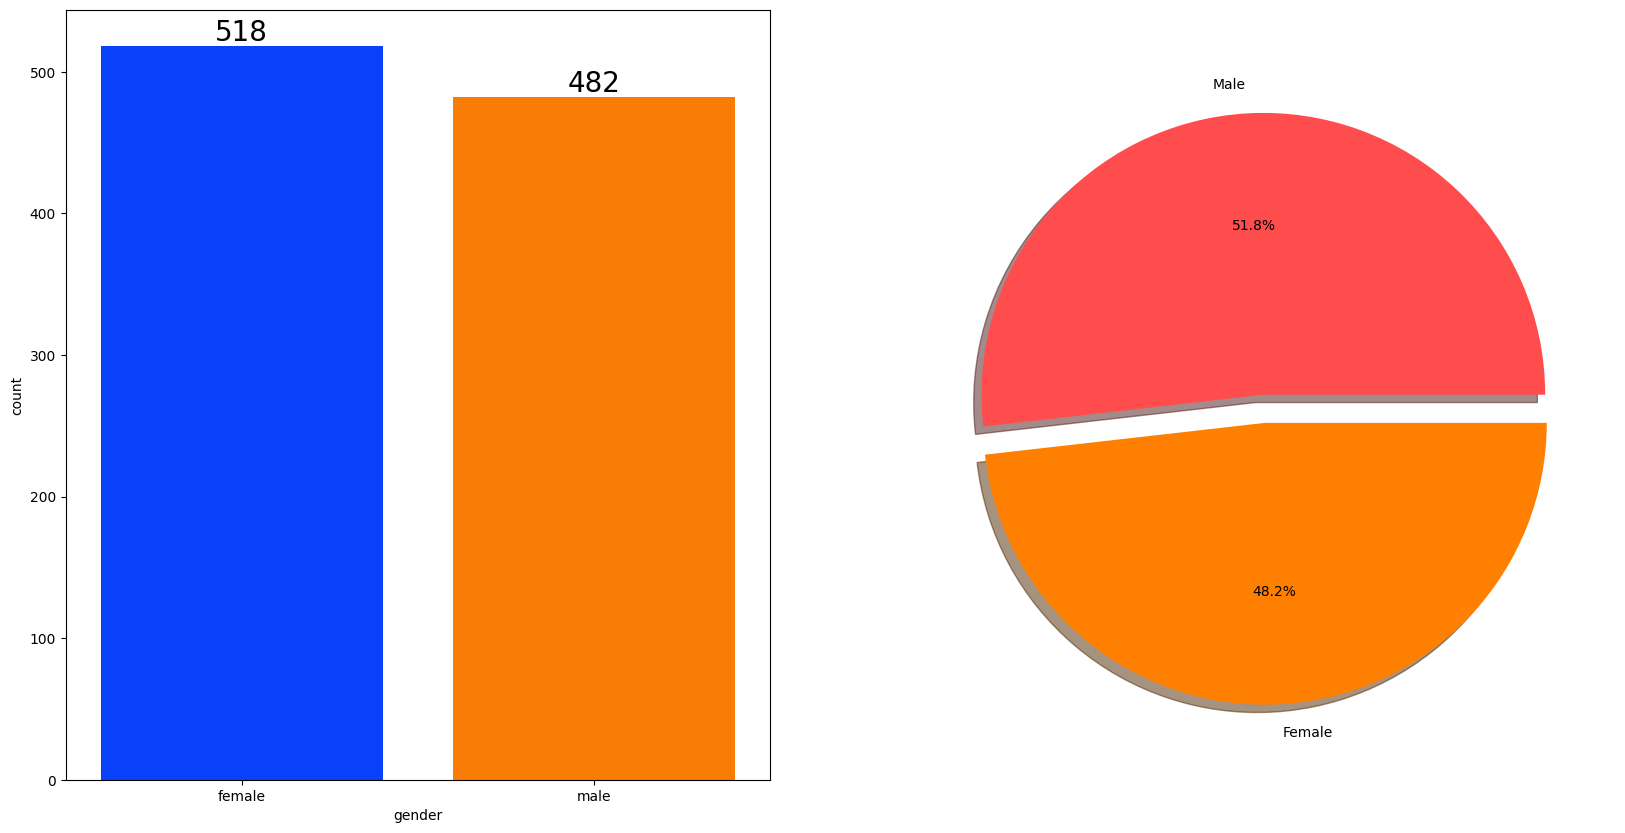

In [39]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df['gender'], data = df, palette='bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [42]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


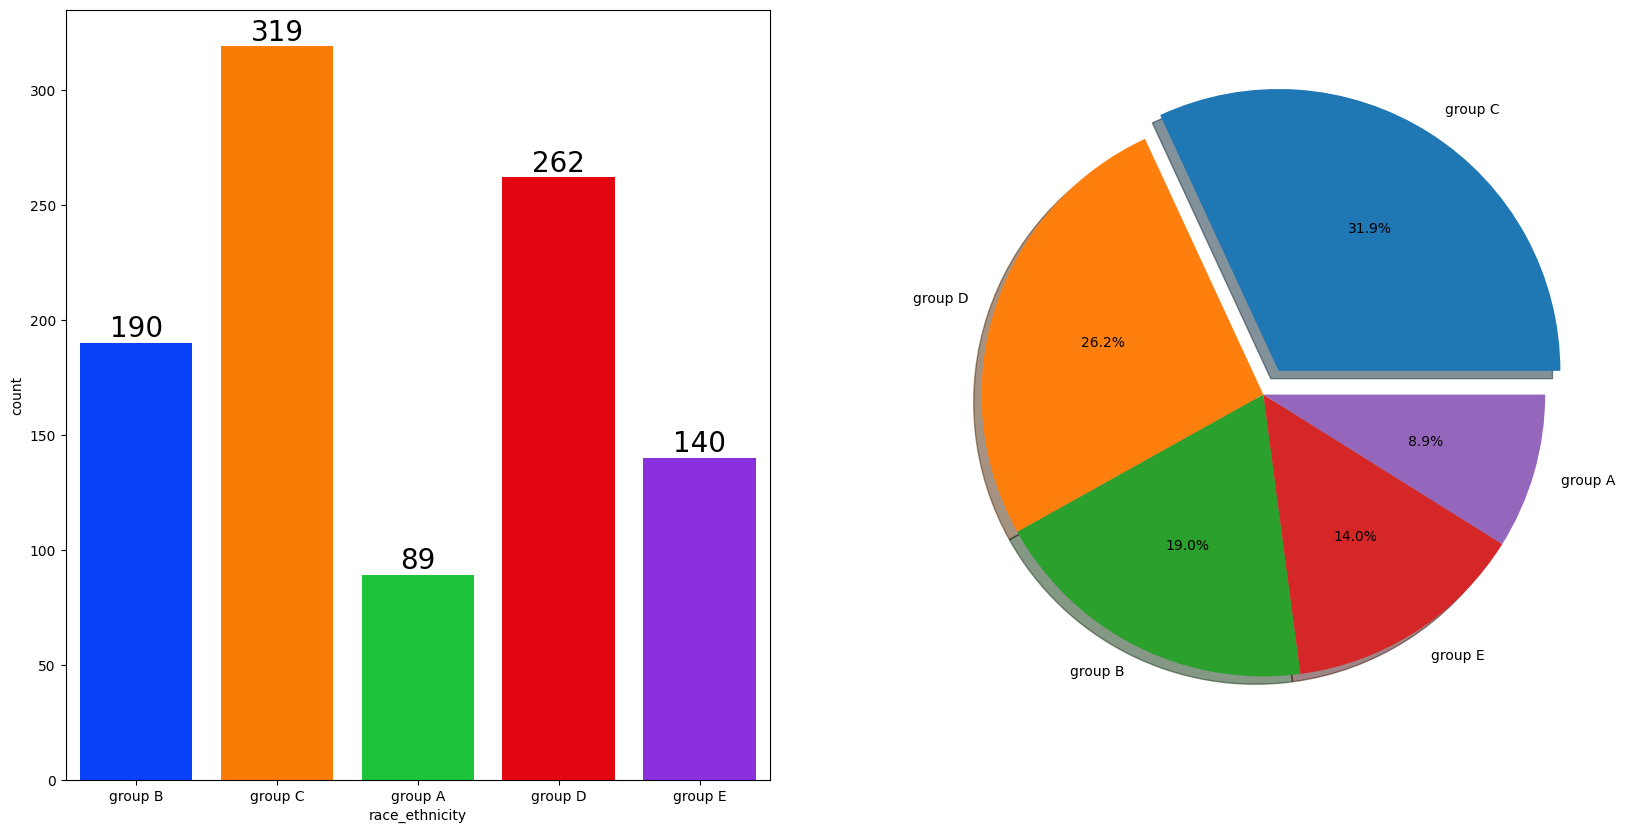

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

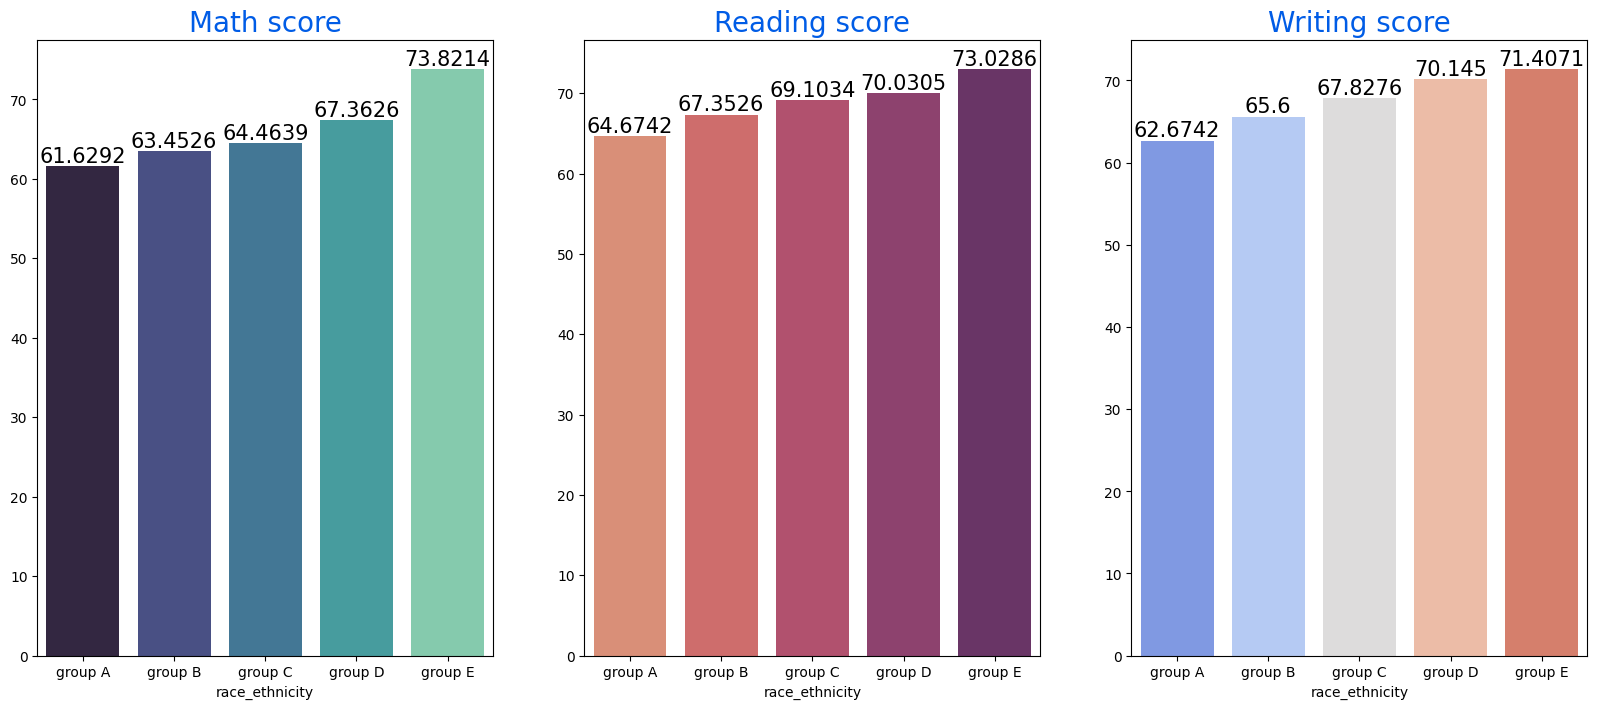

In [49]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects